<a href="https://colab.research.google.com/github/sensei-jirving/Online-DS-PT-01.24.22-cohort-notes/blob/main/Week_07/Lecture_01/CodeAlong/CodeAlong_Classification_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification Metrics

In this notebook we will explore evaluating a model using Sci-kit Learn (AKA sklearn)

# The Data

Today we will use a very commonly used dataset called 'The Titanic Dataset'.

We will be predicting the class of the passengers using the given data.

## This is a multiclass problem because there are 3 possible classes!

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from seaborn import heatmap
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, \
f1_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


In [ ]:
# Define a function to evaluate models

def evaluate_classification(y_true, y_predicted, average=None):
  accuracy = accuracy_score(y_true, y_predicted)
  recall = recall_score(y_true, y_predicted, average=average)
  precision = precision_score(y_true, y_predicted, average=average)
  f1 = f1_score(y_true, y_predicted, average=average)

  print(f'Accuracy: {accuracy} \nRecall: {recall} \nPrecision: {precision} \nF1 Score: {f1}')

# Load the Data

In [ ]:
# Load Iris Dataset
# Load Data
df = pd.read_csv('/content/drive/MyDrive/Coding Dojo/Lectures - Live Class Materials/Stack 2/Week 5/Titanic.csv')

df.head()

df.head()

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,deck,embark_town,alive
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,NaN,Southampton,no
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,C,Cherbourg,yes
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,NaN,Southampton,yes
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,C,Southampton,yes
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,NaN,Southampton,no


# Check for missing or duplicated values

In [ ]:
# Check for duplicates and missing values
print('Missing data:\n', df.isna().sum())
print('\n')
print('Duplicates:', df.duplicated().sum())

Missing data:
 Unnamed: 0       0
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
deck           688
embark_town      2
alive            0
dtype: int64


Duplicates: 0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   sex          891 non-null    object 
 4   age          714 non-null    float64
 5   sibsp        891 non-null    int64  
 6   parch        891 non-null    int64  
 7   fare         891 non-null    float64
 8   embarked     889 non-null    object 
 9   class        891 non-null    object 
 10  who          891 non-null    object 
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
dtypes: float64(2), int64(5), object(7)
memory usage: 97.6+ KB


In [ ]:
print('unique sex', df['sex'].unique())
print('\n')
print('unique embarked', df['embarked'].unique())
print('\n')
print('unique class', df['class'].unique())
print('\n')
print('unique who', df['who'].unique())
print('\n')
print('unique deck', df['deck'].unique())
print('\n')
print('unique embark town', df['embark_town'].unique())
print('\n')
print('unique alive', df['alive'].unique())

unique sex ['male' 'female']


unique embarked ['S' 'C' 'Q' nan]


unique class ['Third' 'First' 'Second']


unique who ['man' 'woman' 'child']


unique deck [nan 'C' 'E' 'G' 'D' 'A' 'B' 'F']


unique embark town ['Southampton' 'Cherbourg' 'Queenstown' nan]


unique alive ['no' 'yes']


# Check Class Balance

In [ ]:
#Check how many samples of each class are present
df['class'].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

In [ ]:
#Check for percentages of each class
df['class'].value_counts(normalize=True)

Third     0.551066
First     0.242424
Second    0.206510
Name: class, dtype: float64

# Validation Split

In [ ]:
#Split the data into training and validation sets
X = df.drop(columns='class')

y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Model the Data

Use a pipeline to scale, one hot encode and fit a model and make predictions

Create a pipeline with the column transformer and the knn model.
Fit the pipeline on your training data.

Save the model's predictions on X_train and X_test in variables.

In [ ]:
# instantiate the column selectors
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')

In [ ]:
#instantiate the standard scaler, OneHotEncoder and Imputers
scaler = StandardScaler()
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

mean_imputer = SimpleImputer(strategy='mean')
freq_imputer = SimpleImputer(strategy='most_frequent')

In [ ]:
# Setup the pipelines for the numeric and categorical data
num_processor = make_pipeline(mean_imputer, scaler)

cat_processor = make_pipeline(freq_imputer, encoder)

In [ ]:
# Setup the tuples to pair the processors with the make column selecotrs

num_tuple = (num_processor, num_selector)

cat_tuple = (cat_processor, cat_selector)

In [ ]:
# Instantiate the make column transformer

col_transformer = make_column_transformer(num_tuple, cat_tuple, remainder='passthrough')

In [ ]:
# Instantatiate model and pipeline

knn = KNeighborsClassifier()

#create and fit pipeline
pipe = make_pipeline(col_transformer, knn)

pipe.fit(X_train, y_train)
#save predictions

train_preds = pipe.predict(X_train)
test_preds = pipe.predict(X_test)

# Model Evaluation

In [ ]:
print('Training Metrics\n')
evaluate_classification(y_train, train_preds, average='macro')
print('\n')

print('Testing Metrics\n')
evaluate_classification(y_test, test_preds, average='macro')

Training Metrics

Accuracy: 0.9820359281437125 
Recall: 0.9732774667164364 
Precision: 0.9836493674044124 
F1 Score: 0.9781597594403887


Testing Metrics

Accuracy: 0.9596412556053812 
Recall: 0.945076516974071 
Precision: 0.954248366013072 
F1 Score: 0.9494857990477515


Recall, precision, and f1 score don't work unless we identify a positive class, or tell the function what kind of average we want.  In the latter case it will return the average score across classes.

If this were a binary classification they would assume we want scores for class 1

In [ ]:
print('Classification Report for Training Set')
train_report = classification_report(y_train, train_preds)

print('Confusion Matrix for Training Set')
train_conf_mat = confusion_matrix(y_train, train_preds)

print('\n\n')

print('Classification Report for Testing Set')

test_report = classification_report(y_test, test_preds)
print(test_report)

print('Confusion Matrix for Testing Set')
test_conf_mat = confusion_matrix(y_test, test_preds)
print(test_conf_mat)

Classification Report for Training Set
Confusion Matrix for Training Set



Classification Report for Testing Set
              precision    recall  f1-score   support

       First       1.00      0.97      0.98        64
      Second       0.90      0.88      0.89        43
       Third       0.96      0.98      0.97       116

    accuracy                           0.96       223
   macro avg       0.95      0.95      0.95       223
weighted avg       0.96      0.96      0.96       223

Confusion Matrix for Testing Set
[[ 62   2   0]
 [  0  38   5]
 [  0   2 114]]


# Plot Confusion Matrix to Get Complete Picture

In [ ]:
#Get names of the class from the class column
sorted_names = pd.Series(df['class'].unique()).sort_values()

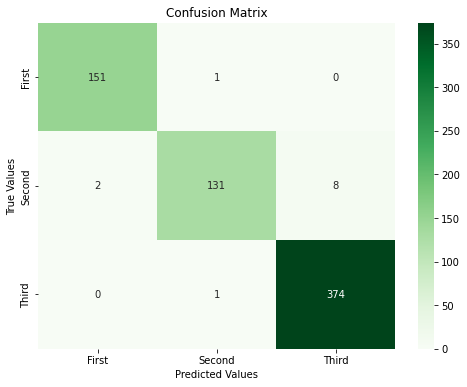

In [ ]:
plt.figure(figsize=(8,6))
heatmap(train_conf_mat, xticklabels=sorted_names,
        yticklabels=sorted_names, cmap='Greens',
        annot=True, fmt='g')
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.title('Confusion Matrix')
plt.show()

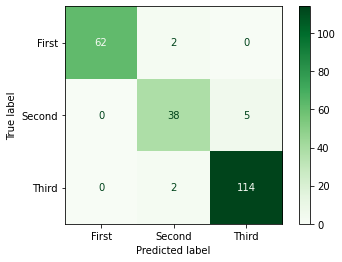

In [ ]:
ConfusionMatrixDisplay.from_estimator(pipe, X_test, y_test, cmap='Greens')

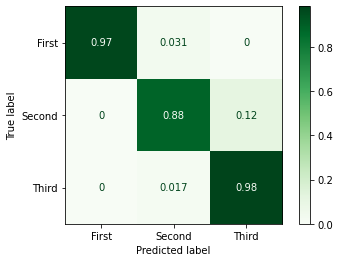

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, test_preds, cmap='Greens', normalize='true')